
<img src="https://www.virtualeducationexpo.ie/wp-content/uploads/2020/08/CCT_Logo_New_Aug_17.jpg" width="400">

# <center> *CA - Machine Learning for Business* <center>

## <center>Lecturer: Dr. Muhammad Iqbal  <center>

## <center>Students: Larcio Lima ID: 2022055 <center>
## <center> Lindon Soares ID 2022012<center>
## <center> Marilia Meneses da Silva ID 2022048 <center>
## <center> Raphael Fernandes ID 2022091 <center>

### <center>*ENEM Data Set*<center>
    
 

## Table of content

## Introduction

## Business Understanding

## Data Understanding

In [1]:
# Importing the libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.metrics import mean_squared_error, r2_score
import random
import math

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Reading the dataset
enem = pd.read_csv("enem_complete.csv")
enem.head(3)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


# EDA

To get started, let's place the dataset in a temporary dataframe.

In [3]:
#   Creating a copy of the dataset
eda_df = enem
eda_df.head()

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94
3,4,35399197,OBJETIVO COLEGIO INTEGRADO,São Paulo,São Paulo,Privada,Urbana,53,677.45,682.90,638.72,836.11,868.68,740.77
4,5,31349720,FIBONACCI COLEGIO,Minas Gerais,Ipatinga,Privada,Urbana,57,666.41,657.87,630.84,809.55,938.95,740.72


Now that we have a temporary dataframe we can work freely with it without changing the original one.

First thing we will do is check for missing values in the data.

In [4]:
#   Checking for missing values

eda_df.isnull().sum()

rank            0
inep_code       0
school          0
state           0
city            0
school_type     0
location        0
students        0
ch              0
cn              0
lc              0
mt              0
rd              0
average_exam    0
dtype: int64

Above we can see that there is no missing values in the dataset, therefore no further operations such as visualization of their distribution or replacement are required.

We can proceed now and check the types of data that we have.

In [5]:
#   Verifying the types of data

eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19598 entries, 0 to 19597
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          19598 non-null  int64  
 1   inep_code     19598 non-null  int64  
 2   school        19598 non-null  object 
 3   state         19598 non-null  object 
 4   city          19598 non-null  object 
 5   school_type   19598 non-null  object 
 6   location      19598 non-null  object 
 7   students      19598 non-null  int64  
 8   ch            19598 non-null  float64
 9   cn            19598 non-null  float64
 10  lc            19598 non-null  float64
 11  mt            19598 non-null  float64
 12  rd            19598 non-null  float64
 13  average_exam  19598 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 2.1+ MB


We can see above that "rank", "inep_code" and "students" are the only integers in the dataset.

"school", "state", "city", "school_type" and "location" are objects, which are mostly contain text values.

The features "ch", "cn", "lc", "mt", "rd" and "average_exam" are all floats.

Now let's have a look at the unique values in the dataset to verify if there are any invalid values such as wrong state names, unknown school types or invalid locations.

In [6]:
#   Checking the unique values

for col in eda_df.columns:
    print('{} : {}'.format(col,eda_df[col].unique()))

rank : [    1     2     3 ... 19596 19597 19598]
inep_code : [23246847 23246871 31350664 ... 13252208 13008196 23071265]
school : ['FARIAS BRITO COLEGIO DE APLICACAO'
 'ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO' 'COLEGIO BERNOULLI' ...
 'ESC EST INDIGENA PROFESSOR GILDO SAMPAIO MEGATANUCU'
 'ESCOLA ESTADUAL ALMIRANTE TAMANDARE'
 'INSTITUTO CEARENSE DE EDUCACAO DE SURDOS']
state : ['Ceará' 'Minas Gerais' 'São Paulo' 'Piauí' 'Rio de Janeiro' 'Pernambuco'
 'Espirito Santo' 'Rio Grande do Norte' 'Distrito Federal' 'Goiás' 'Pará'
 'Rio Grande do Sul' 'Bahia' 'Mato Grosso do Sul' 'Tocantins' 'Paraíba'
 'Maranhão' 'Sergipe' 'Mato Grosso' 'Santa Catarina' 'Paraná' 'Amazonas'
 'Acre' 'Alagoas' 'Rondônia' 'Amapá' 'Roraima']
city : ['Fortaleza' 'Belo Horizonte' 'São Paulo' ... 'Altaneira' 'Lagoa do Mato'
 'Padre Carvalho']
school_type : ['Privada' 'Federal' 'Estadual' 'Municipal']
location : ['Urbana' 'Rural']
students : [ 35  33 280  53  57 142 153  54  43 152  65  31  52  30  56  36  61  2

On the output above we can see that everything apparently seems to be alright and there are invalid values.

Now let's verify the descriptive statistics.

In [7]:
#   Checking the descriptive statistics

eda_df.describe()

,rank,inep_code,students,ch,cn,lc,mt,rd,average_exam
count,19598.000000,1.959800e+04,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000
mean,9799.499949,3.247308e+07,46.481988,504.924703,472.743004,517.846299,522.267425,576.807078,518.917680
std,5657.599574,9.324204e+06,46.220439,46.444994,46.433354,36.839751,68.626260,108.502122,58.754365
min,1.000000,1.100006e+07,10.000000,396.650000,380.660000,377.890000,401.860000,138.890000,360.460000
25%,4900.250000,2.611379e+07,17.000000,472.180000,440.000000,492.250000,474.522500,504.290000,478.460000
50%,9799.500000,3.304433e+07,30.000000,495.610000,458.795000,514.660000,501.550000,554.670000,503.760000
75%,14698.750000,3.590848e+07,58.000000,528.330000,492.517500,538.660000,548.925000,633.585000,547.030000
max,19598.000000,5.308200e+07,616.000000,695.670000,682.900000,652.910000,845.890000,938.950000,760.180000


The descriptive statistics also can be used to validate the data. Above we can see that the minimum value for "rank" is 1 which is correct and if there a was any value lower than 1, it would mean that our dataset has an error.

It is also important to note that for "rank", "inep_code" and "students", which are integers, values such as count, min and max are all integers as well.

Since "ch", "cn", "lc", "mt", "rd" and "average_exam" are floats and are grades that belong to the same scale, we can plot their distribution.

First, let's put the grades on a separate dataset.


In [8]:
grades_df = eda_df[["ch", "lc", "mt", "rd", "average_exam"]]

Text(0.5, 0, 'Subject')

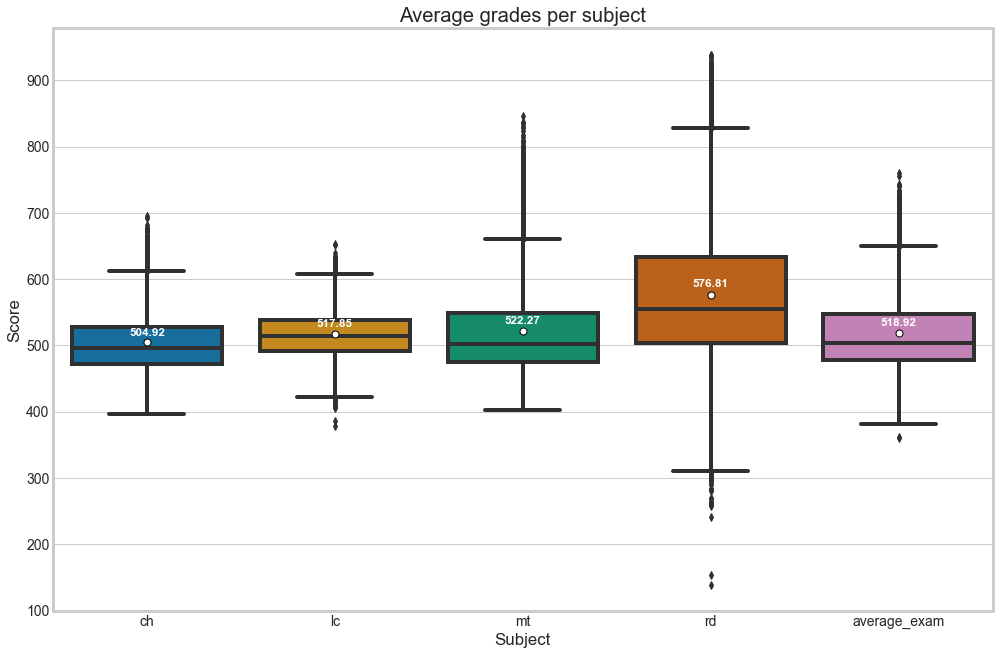

In [100]:
plt.style.use('fivethirtyeight')
sns.set_palette('colorblind')

sns.set_style('whitegrid')
#   Increasing the graph

plt.figure(figsize=(15, 10))


box_plot = sns.boxplot(data=grades_df, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})

means = grades_df.mean()

vertical_offset = grades_df.mean() * 0.02 # offset from mean for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset[xtick],"{:.2f}".format(means[xtick]), 
            horizontalalignment='center', size='small', color='w',weight='semibold')
    

ax = plt.gca()
ax.set_title('Average grades per subject')
ax.set_ylabel('Score')
ax.set_xlabel('Subject')

The graph above shows us that the feature that belongs to the "essay" has the most spread distribution between all the other subjects, it has both the biggest and smallest grades.

On the other hand, "languages, codes and its technologies", which is "lc" has the smallest distribution, which makes sense due to the fact that when we visualized the descriptive statistics of the whole dataset, it was shown that its standard deviation is 36.839.

Among all subjects, essay has the biggest mean, with a value of 554.67 and "mt", which means "mathematics" has the lowest mean, which is 501.55.

### Get average exam based on region

In [10]:
eda_df.head()

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94
3,4,35399197,OBJETIVO COLEGIO INTEGRADO,São Paulo,São Paulo,Privada,Urbana,53,677.45,682.90,638.72,836.11,868.68,740.77
4,5,31349720,FIBONACCI COLEGIO,Minas Gerais,Ipatinga,Privada,Urbana,57,666.41,657.87,630.84,809.55,938.95,740.72


In [11]:
eda_df.state.unique()

array(['Ceará', 'Minas Gerais', 'São Paulo', 'Piauí', 'Rio de Janeiro',
       'Pernambuco', 'Espirito Santo', 'Rio Grande do Norte',
       'Distrito Federal', 'Goiás', 'Pará', 'Rio Grande do Sul', 'Bahia',
       'Mato Grosso do Sul', 'Tocantins', 'Paraíba', 'Maranhão',
       'Sergipe', 'Mato Grosso', 'Santa Catarina', 'Paraná', 'Amazonas',
       'Acre', 'Alagoas', 'Rondônia', 'Amapá', 'Roraima'], dtype=object)

In [12]:
conditions = [
    (eda_df['state'].isin(['Amazonas', 'Acre', 'Roraima', 'Amapá', 'Pará', 'Tocantins', 'Rondônia'])),
    (eda_df['state'].isin(['Ceará', 'Piauí', 'Bahia', 'Maranhão', 'Pernambuco', 'Rio Grande do Norte', 'Paraíba', 'Sergipe', 'Alagoas'])),
    (eda_df['state'].isin(['Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal'])),
    (eda_df['state'].isin(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Espirito Santo'])),
    (eda_df['state'].isin(['Santa Catarina', 'Rio Grande do Sul', 'Paraná']))
    ]

# create a list of the values we want to assign for each condition
values = ['North', 'Northeast', 'Midwest', 'Southeast', 'South']

# create a new column and use np.select to assign values to it using our lists as arguments
eda_df['region'] = np.select(conditions, values)

In [13]:
eda_df.head()

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam,region
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34,Northeast
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94,Southeast
3,4,35399197,OBJETIVO COLEGIO INTEGRADO,São Paulo,São Paulo,Privada,Urbana,53,677.45,682.90,638.72,836.11,868.68,740.77,Southeast
4,5,31349720,FIBONACCI COLEGIO,Minas Gerais,Ipatinga,Privada,Urbana,57,666.41,657.87,630.84,809.55,938.95,740.72,Southeast


Text(0.5, 0, 'Region')

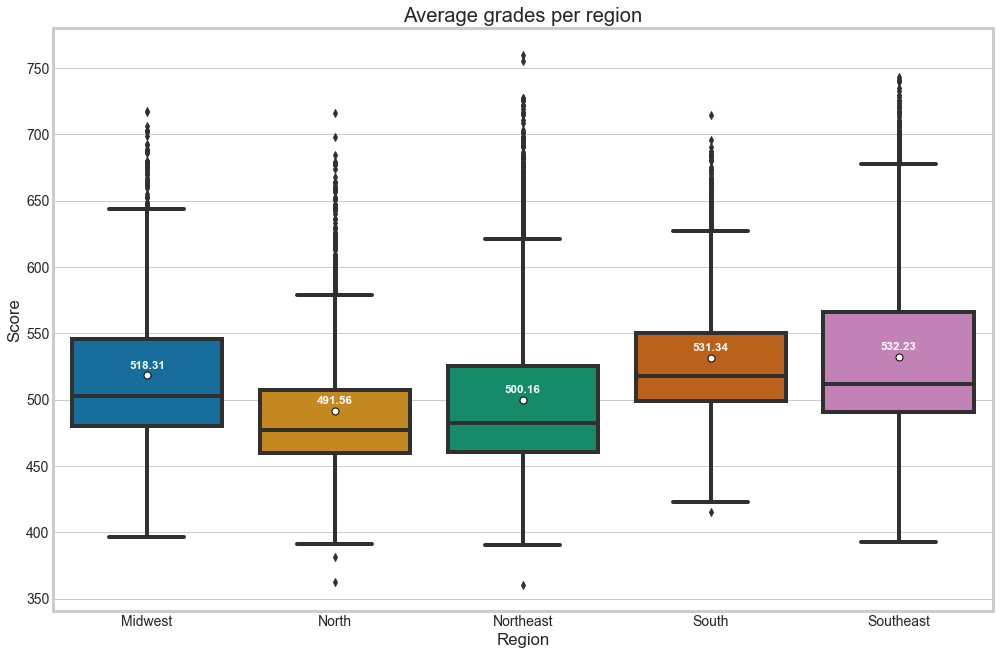

In [112]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')
#   Increasing the graph

plt.figure(figsize=(15, 10))

box_plot = sns.boxplot(data=eda_df.sort_values(by='region', ascending=True), x='region', y='average_exam', showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})

means = eda_df.sort_values(by='region', ascending=True).groupby(['region'])['average_exam'].mean()
vertical_offset = means * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick]+vertical_offset[xtick],"{:.2f}".format(means[xtick]), 
            horizontalalignment='center',size='small',color='w',weight='bold')

ax = plt.gca()
ax.set_title('Average grades per region')
ax.set_ylabel('Score')
ax.set_xlabel('Region')

##  Get average based on school type

In [15]:
eda_df.head()

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam,region
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34,Northeast
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94,Southeast
3,4,35399197,OBJETIVO COLEGIO INTEGRADO,São Paulo,São Paulo,Privada,Urbana,53,677.45,682.90,638.72,836.11,868.68,740.77,Southeast
4,5,31349720,FIBONACCI COLEGIO,Minas Gerais,Ipatinga,Privada,Urbana,57,666.41,657.87,630.84,809.55,938.95,740.72,Southeast


Text(0.5, 0, 'School Types')

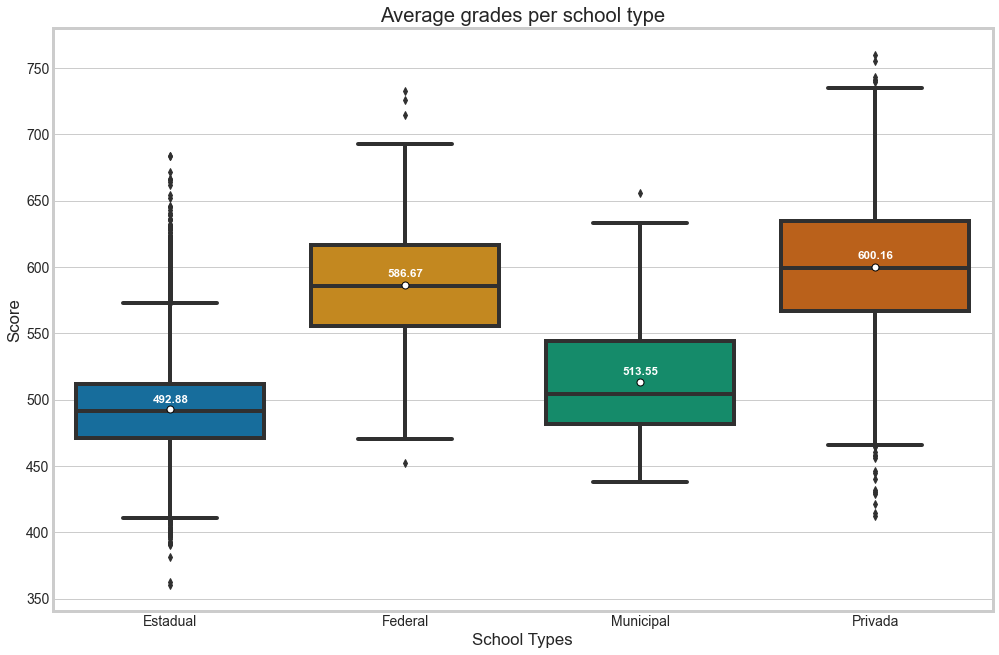

In [113]:
plt.figure(figsize=(15, 10))
sns.set_palette('colorblind')

boxplot = sns.boxplot(data=eda_df.sort_values(by='school_type', ascending=True), x='school_type', y='average_exam', showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})


means = eda_df.sort_values(by='school_type', ascending=True).groupby(['school_type'])['average_exam'].mean()
vertical_offset = means * 0.01 # offset from median for display

for xtick in boxplot.get_xticks():
    boxplot.text(xtick,means[xtick] + vertical_offset[xtick],"{:.2f}".format(means[xtick]), 
            horizontalalignment='center',size='small',color='w',weight='bold')
    
    
ax = plt.gca()
ax.set_title('Average grades per school type')
ax.set_ylabel('Score')
ax.set_xlabel('School Types')

# Data Preparation

In [3]:
# copying df
df_preparing = enem.copy()
df_preparing.head(3)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


In [4]:
# Dropping unnecessary columns
df_preparing.drop(["rank", "inep_code", 'school', 'city'], axis=1, inplace=True)
df_preparing.head(3)

,state,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,Ceará,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,Ceará,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,Minas Gerais,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


In [5]:
#designating the region of each state.

def sub(x):
    
    # North
    if x == 'Amazonas' or x =='Roraima' or x =='Amapá' or x =='Pará' or x =='Tocantins' or x =='Rondônia' or x =='Acre':
        return "North"
    
    # Northeast
    elif x == 'Maranhão' or x =='Piauí' or x =='Ceará' or x =='Pernambuco' or x =='Paraíba' or x =='Rio Grande do Norte' or x =='Sergipe' or x =='Alagoas' or x =='Bahia':
        return "Northeast"
    
    # Midwest
    elif x == 'Mato Grosso' or x =='Mato Grosso do Sul' or x =='Goiás':
        return "Midwest"
    
    
    # Southeast
    elif x == 'São Paulo' or x =='Minas Gerais' or x =='Rio de Janeiro' or x =='Espirito Santo':
        return "Southeast"
    
    # South
    elif x == 'Paraná' or x =='Rio Grande do Sul' or x =='Santa Catarina':
        return "South"
    
    elif x == 'Distrito Federal':
        return "Federal District"

In [6]:
df_preparing['region'] = df_preparing['state'].apply(lambda x: sub(x))

In [7]:
df_preparing

,state,school_type,location,students,ch,cn,lc,mt,rd,average_exam,region
0,Ceará,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,Ceará,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34,Northeast
2,Minas Gerais,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94,Southeast
3,São Paulo,Privada,Urbana,53,677.45,682.90,638.72,836.11,868.68,740.77,Southeast
4,Minas Gerais,Privada,Urbana,57,666.41,657.87,630.84,809.55,938.95,740.72,Southeast
...,...,...,...,...,...,...,...,...,...,...,...
19593,Tocantins,Estadual,Rural,10,423.49,412.24,386.12,449.16,284.00,391.00,North
19594,Maranhão,Estadual,Urbana,16,439.87,409.58,431.09,411.73,261.25,390.70,Northeast
19595,Amazonas,Estadual,Rural,56,422.24,407.61,411.16,425.47,241.79,381.65,North
19596,Amazonas,Estadual,Rural,21,432.40,405.50,377.89,441.75,154.29,362.36,North


In [8]:
df_preparing['region'].unique()

array(['Northeast', 'Southeast', 'Federal District', 'Midwest', 'North',
       'South'], dtype=object)

# Unsupervised Learning

In [9]:
df_preparing.head(2)

,state,school_type,location,students,ch,cn,lc,mt,rd,average_exam,region
0,Ceará,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,Ceará,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34,Northeast


In [10]:
df_school_type = df_preparing.drop(['state', 'location', 'average_exam', 'region'], axis = 1)
df_school_type.head(2)

,school_type,students,ch,cn,lc,mt,rd
0,Privada,35,692.85,674.50,652.24,845.89,935.43
1,Privada,33,695.67,676.34,652.91,836.65,915.15


In [11]:
plt.style.use('fivethirtyeight')

Ploting the Relation between the grades.

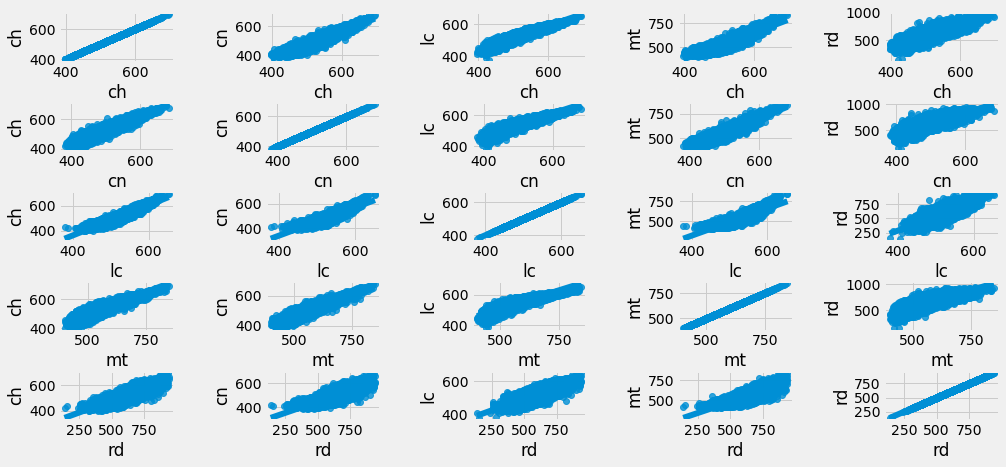

In [20]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['ch' , 'cn' , 'lc', 'mt', 'rd']:
    for y in ['ch' , 'cn' , 'lc', 'mt', 'rd']:
        n += 1
        plt.subplot(5 , 5 , n)
        plt.subplots_adjust(hspace = 0.8 , wspace = 0.8)
        sns.regplot(x = x , y = y , data = df_school_type)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()


In [13]:
# Encoding the categorical variables
df_encoded = pd.get_dummies(df_preparing, columns = ['school_type', 'location', 'region','state'])
df_encoded.head(3)

,students,ch,cn,lc,mt,rd,average_exam,school_type_Estadual,school_type_Federal,school_type_Municipal,...,state_Piauí,state_Rio Grande do Norte,state_Rio Grande do Sul,state_Rio de Janeiro,state_Rondônia,state_Roraima,state_Santa Catarina,state_Sergipe,state_São Paulo,state_Tocantins
0,35,692.85,674.50,652.24,845.89,935.43,760.18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,695.67,676.34,652.91,836.65,915.15,755.34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,280,681.58,668.20,634.47,823.80,906.64,742.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# KMeans

In [17]:
from sklearn.cluster import KMeans

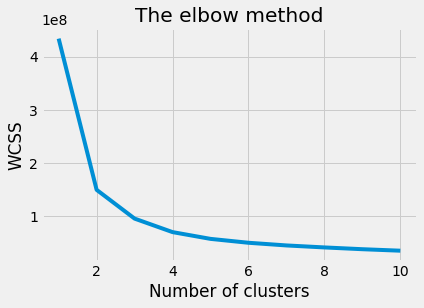

In [18]:
# Load 5 columns
x = df_school_type.iloc[:, [2, 3, 4,5, 6]].values

wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)  # Initialise an object kmeans by calling 
                                                                                    # an object KMeans()
    kmeans.fit(x)                                                                   # Training the model by calling fit() method
    wcss.append(kmeans.inertia_)                                                    # Store kmeans.inertia_ in the array wcss
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

In [21]:
df_cluster_KMeans = df_school_type.drop('school_type', axis = 1)
df_cluster_KMeans

,students,ch,cn,lc,mt,rd
0,35,692.85,674.50,652.24,845.89,935.43
1,33,695.67,676.34,652.91,836.65,915.15
2,280,681.58,668.20,634.47,823.80,906.64
3,53,677.45,682.90,638.72,836.11,868.68
4,57,666.41,657.87,630.84,809.55,938.95
...,...,...,...,...,...,...
19593,10,423.49,412.24,386.12,449.16,284.00
19594,16,439.87,409.58,431.09,411.73,261.25
19595,56,422.24,407.61,411.16,425.47,241.79
19596,21,432.40,405.50,377.89,441.75,154.29


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.fit(df_cluster_KMeans)

In [ ]:
kmeans.labels_

In [ ]:
df_school_type['cluster_KMeans'] = kmeans.labels_

In [ ]:
df_school_type

# KMedoids

In [ ]:
df_cluster_KMedoid = df_school_type.drop(['school_type', 'cluster_KMeans'], axis = 1)
df_cluster_KMedoid

In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(df_cluster_KMedoid)

In [ ]:
kmedoids.labels_

In [ ]:
df_school_type['cluster_KMedoids'] = kmedoids.labels_
df_school_type

# Comparinng

### Original

In [ ]:
df_school_type = df_school_type.reindex(['students', 'ch', 'cn', 'lc', 'mt', 'rd', 'school_type', 'cluster_KMeans', 'cluster_KMedoids' ], axis=1)

In [ ]:
df_school_type.head(2)

In [ ]:
sns.pairplot(df_school_type, hue='school_type')

### KMeans

In [ ]:
sns.pairplot(df_school_type, hue='cluster_KMeans')

### KMedoid

In [ ]:
sns.pairplot(df_school_type, hue='cluster_KMedoids')

# Supervised Learning

### Encoding

In [ ]:
df_preparing.head(2)

In [ ]:
# Encoding the categorical variables
df_encoded = pd.get_dummies(df_preparing, columns = ['school_type', 'location', 'region'])
df_encoded.head(3)

In [ ]:
df_encoded = df_encoded.drop(['state', 'average_exam'], axis=1)

### Correlation Analysis

In [ ]:
# Checking variables' relation
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_preparing.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='Blues').set(title='Heatmap - Entire dataset')

In [ ]:
# Checking variables' relation
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_encoded.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='Blues').set(title='Heatmap - Entire dataset')

# Models

In [ ]:
# Spliting the dataset
from sklearn.model_selection import train_test_split
X = df_encoded.drop('rd', axis=1)
y = df_encoded['rd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)




In [ ]:
X_train

In [ ]:
# X_train= X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression


# Training the model on the Training set
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, y_train)

### Precision

In [ ]:
# Precision of the model - Train set
print('The precision of the model is ')
print(regressor_LR.score(X_train, y_train))

In [ ]:
# Precision of the model - Test set
y_pred = regressor_LR.predict(X_test)

R_square = r2_score(y_test,y_pred) 
print('Coefficient of Determination', R_square)